# Perceptron

###### Maths behind Perceptron Training

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

GENERATING DATASETS

In [2]:
# Generating the dataset using make_blobs 
X,Y = make_blobs(n_samples=800, centers=2, n_features=2, random_state=2)
print(X.shape, Y.shape)

(800, 2) (800,)


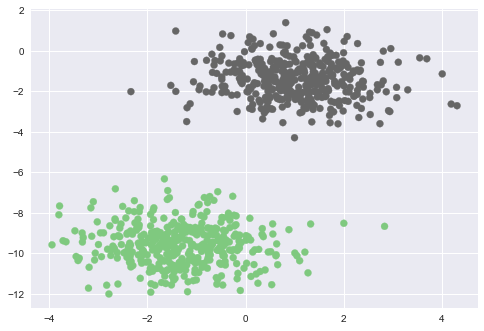

In [3]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap = plt.cm.Accent)
plt.show()

###### MODEL AND HELPER FUNCTIONS

Sigmoid function is an activation function (denoted as sigma(z)). 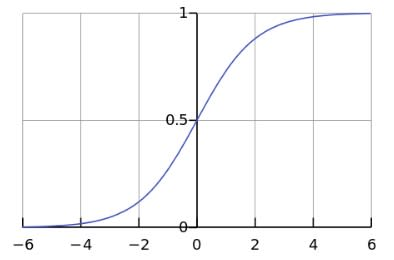

The output of the sigma(z) belongs to the range 0 to 1. 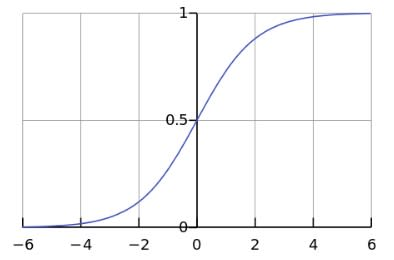

0 means - highly negative input and 1 means - highly positive input 
This is useful as an activation function when one is interested in probability mapping rather than precise values of input parameter t.

In [4]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

###### IMPLEMENT PERCEPTRON LEARNING ALGORITHMS
- Learn weights
- Reduce the loss
- Make the predictions

- We can not use Mean Squared Error loss fucntion because it is a non convex function. When we minimize
the loss using gradient descent there will be high probabilty of getting stuck at local minima.
- So to overcome this difficulty we will use Log Loss

In [5]:
def predict(X,weights):
    """ X -> mx(n+1) matrix, w -> (nx1)matrix """
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions
def loss(X,Y,weights):
    """ Binary Cross Entropy """
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost
def update(X,Y,weights,lr):
    """ Perform weight updates for 1 epoch """
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_-Y)
    m = X.shape[0]
    weights = weights - lr*dw/(float(m))
    return weights
def train(X,Y,lr=0.3,maxEpochs = 1000):
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    weights = np.zeros(X.shape[1])
    for epoch in range(maxEpochs):
        weights = update(X,Y,weights,lr)
        if epoch%10==0:
            l=loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
    return weights

In [6]:
weights = train(X,Y)

Epoch 0 Loss 0.5672
Epoch 10 Loss 0.2233
Epoch 20 Loss 0.1676
Epoch 30 Loss 0.1389
Epoch 40 Loss 0.1204
Epoch 50 Loss 0.1070
Epoch 60 Loss 0.0967
Epoch 70 Loss 0.0884
Epoch 80 Loss 0.0815
Epoch 90 Loss 0.0757
Epoch 100 Loss 0.0707
Epoch 110 Loss 0.0663
Epoch 120 Loss 0.0624
Epoch 130 Loss 0.0590
Epoch 140 Loss 0.0559
Epoch 150 Loss 0.0532
Epoch 160 Loss 0.0507
Epoch 170 Loss 0.0484
Epoch 180 Loss 0.0463
Epoch 190 Loss 0.0444
Epoch 200 Loss 0.0426
Epoch 210 Loss 0.0410
Epoch 220 Loss 0.0394
Epoch 230 Loss 0.0380
Epoch 240 Loss 0.0367
Epoch 250 Loss 0.0355
Epoch 260 Loss 0.0344
Epoch 270 Loss 0.0333
Epoch 280 Loss 0.0323
Epoch 290 Loss 0.0313
Epoch 300 Loss 0.0304
Epoch 310 Loss 0.0296
Epoch 320 Loss 0.0288
Epoch 330 Loss 0.0280
Epoch 340 Loss 0.0273
Epoch 350 Loss 0.0266
Epoch 360 Loss 0.0260
Epoch 370 Loss 0.0253
Epoch 380 Loss 0.0248
Epoch 390 Loss 0.0242
Epoch 400 Loss 0.0237
Epoch 410 Loss 0.0231
Epoch 420 Loss 0.0226
Epoch 430 Loss 0.0222
Epoch 440 Loss 0.0217
Epoch 450 Loss 0.0213

#### Activation Function
1. The activation function to be used is a subjective decision taken by the data scientist, based on the problem statement and the form of the desired results.
2. If the learning process is slow or has vanishing or exploding gradients, the data scientist may try to change the activation function to see if these problems can be resolved.

In [7]:
weights

array([5.67877365, 1.09730027, 1.15036163])

###### PERCEPTRON IMPLEMENTATION PART II
- MAKE PREDICTION
- VISUALISE DESCISION SURFACE 
- LINEAR VS NON LINEAR CLASSIFICATION

In [8]:
def getpredict(X_test,weights,labels = True):
    if X_test.shape[1]!=weights.shape[0]:
        ones = np.ones((X_test.shape[0],1))
        X_test = np.hstack((ones,X_test))
        
    probs = predict(X_test,weights)
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels

In [9]:
weights

array([5.67877365, 1.09730027, 1.15036163])

In [10]:
x1 = np.linspace(-10,2,10)
print(x1)
x2 = -(weights[0]+weights[1]*x1)/weights[2]
print(x2)

[-10.          -8.66666667  -7.33333333  -6.          -4.66666667
  -3.33333333  -2.          -0.66666667   0.66666667   2.        ]
[ 4.60223019  3.33039794  2.05856569  0.78673344 -0.48509881 -1.75693106
 -3.02876331 -4.30059556 -5.57242781 -6.84426007]


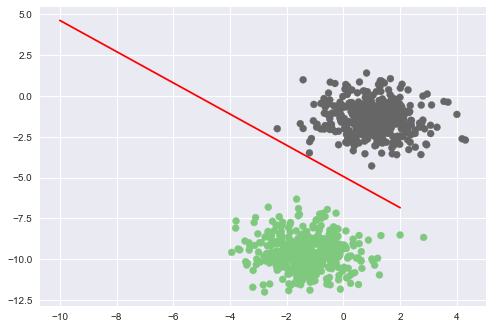

In [11]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap = plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

ACCURACY

In [12]:
y_ = getpredict(X,weights,labels= True)
training_acc = np.sum(y_==Y)/Y.shape[0]
print(training_acc)

1.0
